In [1]:
# differential evolution search of the two-dimensional sphere objective function
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmin
from numpy import min
from numpy import around

# define objective function
def obj(x):
    return x[0]**2.0 + x[1]**2.0

# define mutation operation
def mutation(x, F):
    return x[0] + F * (x[1] - x[2])

# define boundary check operation
def check_bounds(mutated, bounds):
    mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound

# define crossover operation
def crossover(mutated, target, dims, cr):
    
    # generate a uniform random value for every dimension
    p = rand(dims)
    
    # generate trial vector by binomial crossover
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial

def differential_evolution(pop_size, bounds, iter, F, cr):
    
    # initialise population of candidate solutions randomly within the specified bounds
    pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    
    # evaluate initial population of candidate solutions
    obj_all = [obj(ind) for ind in pop]
    
    # find the best performing vector of initial population
    best_vector = pop[argmin(obj_all)]
    best_obj = min(obj_all)
    prev_obj = best_obj
    
    # run iterations of the algorithm
    for i in range(iter):
        
        # iterate over all candidate solutions
        for j in range(pop_size):
            
            # choose three candidates, a, b and c, that are not the current one
            candidates = [candidate for candidate in range(pop_size) if candidate != j]
            a, b, c = pop[choice(candidates, 3, replace=False)]
            
            # perform mutation
            mutated = mutation([a, b, c], F)
            
            # check that lower and upper bounds are retained after mutation
            mutated = check_bounds(mutated, bounds)
            
            # perform crossover
            trial = crossover(mutated, pop[j], len(bounds), cr)
            
            # compute objective function value for target vector
            obj_target = obj(pop[j])
            
            # compute objective function value for trial vector
            obj_trial = obj(trial)
            
            # perform selection
            if obj_trial < obj_target:
                
                # replace the target vector with the trial vector
                pop[j] = trial
                
                # store the new objective function value
                obj_all[j] = obj_trial
                
        # find the best performing vector at each iteration
        best_obj = min(obj_all)
        
        # store the lowest objective function value
        if best_obj < prev_obj:
            best_vector = pop[argmin(obj_all)]
            prev_obj = best_obj
            
            # report progress at each iteration
            print('Iteration: %d f([%s]) = %.5f' % (i, around(best_vector, decimals=5), best_obj))
    return [best_vector, best_obj]

# define population size
pop_size = 10

# define lower and upper bounds for every dimension
bounds = asarray([(-5.0, 5.0), (-5.0, 5.0)])

# define number of iterations
iter = 100

# define scale factor for mutation
F = 0.5

# define crossover rate for recombination
cr = 0.7

# perform differential evolution
solution = differential_evolution(pop_size, bounds, iter, F, cr)
print('\nSolution: f([%s]) = %.5f' % (around(solution[0], decimals=5), solution[1]))

Iteration: 2 f([[ 0.25414 -0.40733]]) = 0.23050
Iteration: 4 f([[0.36292 0.01652]]) = 0.13198
Iteration: 7 f([[0.13948 0.13483]]) = 0.03763
Iteration: 8 f([[0.00508 0.03886]]) = 0.00154
Iteration: 11 f([[0.01087 0.03364]]) = 0.00125
Iteration: 14 f([[0.00065 0.00067]]) = 0.00000
Iteration: 23 f([[0.00048 0.00034]]) = 0.00000
Iteration: 24 f([[ 0.00026 -0.00017]]) = 0.00000
Iteration: 26 f([[ 1.5e-04 -5.0e-05]]) = 0.00000
Iteration: 27 f([[-1.2e-04 -6.0e-05]]) = 0.00000
Iteration: 30 f([[-3.e-05 -4.e-05]]) = 0.00000
Iteration: 32 f([[-3.e-05 -3.e-05]]) = 0.00000
Iteration: 34 f([[-3.e-05  3.e-05]]) = 0.00000
Iteration: 35 f([[3.e-05 3.e-05]]) = 0.00000
Iteration: 36 f([[ 2.e-05 -1.e-05]]) = 0.00000
Iteration: 37 f([[-2.e-05  1.e-05]]) = 0.00000
Iteration: 38 f([[-1.e-05 -0.e+00]]) = 0.00000
Iteration: 40 f([[-0.  0.]]) = 0.00000
Iteration: 42 f([[0. 0.]]) = 0.00000
Iteration: 44 f([[-0.  0.]]) = 0.00000
Iteration: 45 f([[-0. -0.]]) = 0.00000
Iteration: 47 f([[ 0. -0.]]) = 0.00000
Iterat

Iteration: 0 f([[-0.88051  1.04139]]) = 1.85980
Iteration: 2 f([[-0.2586   1.04139]]) = 1.15137
Iteration: 3 f([[-0.22889  0.29503]]) = 0.13943
Iteration: 4 f([[-0.03271 -0.12886]]) = 0.01767
Iteration: 8 f([[ 0.12322 -0.00306]]) = 0.01519
Iteration: 9 f([[ 0.03963 -0.00306]]) = 0.00158
Iteration: 12 f([[ 0.01517 -0.01649]]) = 0.00050
Iteration: 15 f([[ 0.01693 -0.00306]]) = 0.00030
Iteration: 17 f([[ 0.01678 -0.00306]]) = 0.00029
Iteration: 18 f([[0.01563 0.00293]]) = 0.00025
Iteration: 20 f([[0.01337 0.00021]]) = 0.00018
Iteration: 21 f([[0.0113  0.00703]]) = 0.00018
Iteration: 22 f([[0.01035 0.00021]]) = 0.00011
Iteration: 27 f([[ 0.00962 -0.00074]]) = 0.00009
Iteration: 28 f([[0.00957 0.00021]]) = 0.00009
Iteration: 29 f([[ 0.0093  -0.00052]]) = 0.00009
Iteration: 32 f([[ 0.00898 -0.00099]]) = 0.00008
Iteration: 33 f([[ 0.00869 -0.00084]]) = 0.00008
Iteration: 36 f([[ 0.00866 -0.00055]]) = 0.00008
Iteration: 37 f([[ 0.00858 -0.00047]]) = 0.00007
Iteration: 41 f([[ 0.0085  -0.00049]

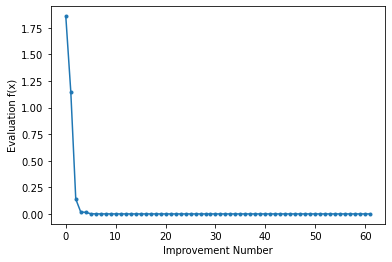

In [2]:
# differential evolution search of the two-dimensional sphere objective function
from numpy.random import rand
from numpy.random import choice
from numpy import asarray
from numpy import clip
from numpy import argmin
from numpy import min
from numpy import around
from matplotlib import pyplot

# define objective function
def obj(x):
    return x[0]**2.0 + x[1]**2.0

# define mutation operation
def mutation(x, F):
    return x[0] + F * (x[1] - x[2])

# define boundary check operation
def check_bounds(mutated, bounds):
    mutated_bound = [clip(mutated[i], bounds[i, 0], bounds[i, 1]) for i in range(len(bounds))]
    return mutated_bound

# define crossover operation
def crossover(mutated, target, dims, cr):
    
    # generate a uniform random value for every dimension
    p = rand(dims)
    
    # generate trial vector by binomial crossover
    trial = [mutated[i] if p[i] < cr else target[i] for i in range(dims)]
    return trial

def differential_evolution(pop_size, bounds, iter, F, cr):
    
    # initialise population of candidate solutions randomly within the specified bounds
    pop = bounds[:, 0] + (rand(pop_size, len(bounds)) * (bounds[:, 1] - bounds[:, 0]))
    
    # evaluate initial population of candidate solutions
    obj_all = [obj(ind) for ind in pop]
    
    # find the best performing vector of initial population
    best_vector = pop[argmin(obj_all)]
    best_obj = min(obj_all)
    prev_obj = best_obj
    
    # initialise list to store the objective function value at each iteration
    obj_iter = list()
    
    # run iterations of the algorithm
    for i in range(iter):
        
        # iterate over all candidate solutions
        for j in range(pop_size):
            
            # choose three candidates, a, b and c, that are not the current one
            candidates = [candidate for candidate in range(pop_size) if candidate != j]
            a, b, c = pop[choice(candidates, 3, replace=False)]
            
            # perform mutation
            mutated = mutation([a, b, c], F)
            
            # check that lower and upper bounds are retained after mutation
            mutated = check_bounds(mutated, bounds)
            
            # perform crossover
            trial = crossover(mutated, pop[j], len(bounds), cr)
            
            # compute objective function value for target vector
            obj_target = obj(pop[j])
            
            # compute objective function value for trial vector
            obj_trial = obj(trial)
            
            # perform selection
            if obj_trial < obj_target:
                
                # replace the target vector with the trial vector
                pop[j] = trial
                
                # store the new objective function value
                obj_all[j] = obj_trial
                
        # find the best performing vector at each iteration
        best_obj = min(obj_all)
        
        # store the lowest objective function value
        if best_obj < prev_obj:
            best_vector = pop[argmin(obj_all)]
            prev_obj = best_obj
            obj_iter.append(best_obj)
            
            # report progress at each iteration
            print('Iteration: %d f([%s]) = %.5f' % (i, around(best_vector, decimals=5), best_obj))
    return [best_vector, best_obj, obj_iter]

# define population size
pop_size = 10

# define lower and upper bounds for every dimension
bounds = asarray([(-5.0, 5.0), (-5.0, 5.0)])

# define number of iterations
iter = 100

# define scale factor for mutation
F = 0.5

# define crossover rate for recombination
cr = 0.7

# perform differential evolution
solution = differential_evolution(pop_size, bounds, iter, F, cr)
print('\nSolution: f([%s]) = %.5f' % (around(solution[0], decimals=5), solution[1]))

# line plot of best objective function values
pyplot.plot(solution[2], '.-')
pyplot.xlabel('Improvement Number')
pyplot.ylabel('Evaluation f(x)')
pyplot.show()